In [ ]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=200)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted para múltiple clases
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, target_names=iris.target_names)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar resultados
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nReporte de Clasificación:\n", report)
print("Matriz de Confusión:\n", conf_matrix)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Reporte de Clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Matriz de Confusión:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


Primeras filas del dataset Iris:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Descripción estadística:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Conteo de clases:


,count
species,
0,50
1,50
2,50


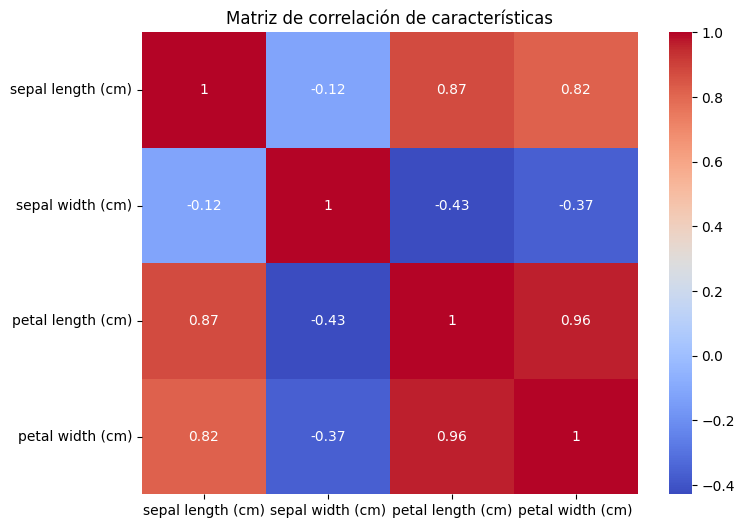

Reporte completo de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Exactitud (accuracy): 0.9333333333333333
Precisión macro: 0.9333333333333332
Recall macro: 0.9333333333333332
F1 score macro: 0.9333333333333332


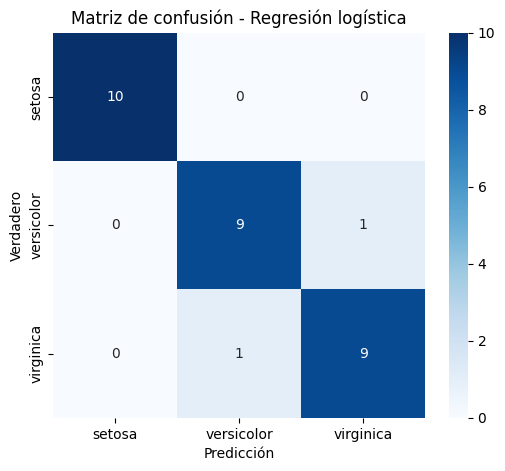

Tabla de conteo de errores:


,Error,Conteo
0,0,28
1,1,1
2,-1,1


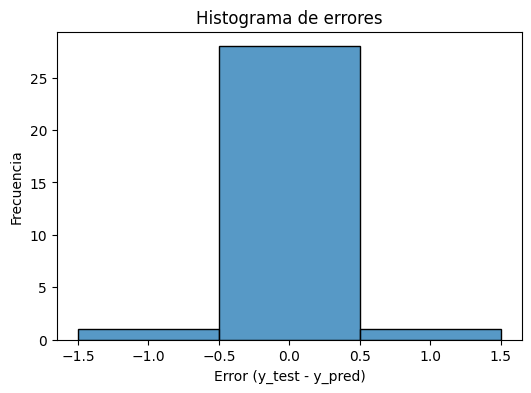

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Cargar el dataset Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Mostrar primeras filas del dataset
print("Primeras filas del dataset Iris:")
display(X.head())

# Estadísticas descriptivas
print("\nDescripción estadística:")
display(X.describe())

# Conteo de cada clase
print("\nConteo de clases:")
display(y.value_counts())

# Matriz de correlación con mapa de calor
plt.figure(figsize=(8,6))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación de características')
plt.show()

# División en conjunto de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de regresión logística
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

# Predicción en conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Mostrar métricas de clasificación
print("Reporte completo de clasificación:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("Exactitud (accuracy):", accuracy_score(y_test, y_pred))
print("Precisión macro:", precision_score(y_test, y_pred, average='macro'))
print("Recall macro:", recall_score(y_test, y_pred, average='macro'))
print("F1 score macro:", f1_score(y_test, y_pred, average='macro'))

# Matriz de confusión con mapa de calor
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de confusión - Regresión logística')
plt.show()

# Cálculo del error (y_test - y_pred)
error = y_test.values - y_pred

# Tabla de conteo de errores
errors_df = pd.DataFrame({'Error': error})
error_counts = errors_df['Error'].value_counts().reset_index()
error_counts.columns = ['Error', 'Conteo']

print("Tabla de conteo de errores:")
display(error_counts)

# Histograma de errores
plt.figure(figsize=(6,4))
sns.histplot(error, bins=np.arange(error.min()-0.5, error.max()+1.5, 1), kde=False)
plt.xlabel('Error (y_test - y_pred)')
plt.ylabel('Frecuencia')
plt.title('Histograma de errores')
plt.show()


# Task
Analiza el dataset de dígitos manuscritos de `sklearn.datasets` utilizando un modelo de regresión logística.

## Cargar el dataset de dígitos

### Subtask:
Cargar el dataset de dígitos manuscritos desde `sklearn.datasets`.


**Reasoning**:
The subtask is to load the digits dataset. I will import the necessary function and load the data into a variable as instructed.



In [ ]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

## Exploración de datos

### Subtask:
Mostrar las primeras filas del dataset (como imágenes) y sus estadísticas descriptivas. Visualizar la distribución de las clases.


**Reasoning**:
The next step is to display the first few images, show descriptive statistics of the data, and visualize the distribution of the target classes, as requested in the instructions. This involves using matplotlib for image display and pandas for data manipulation and description.



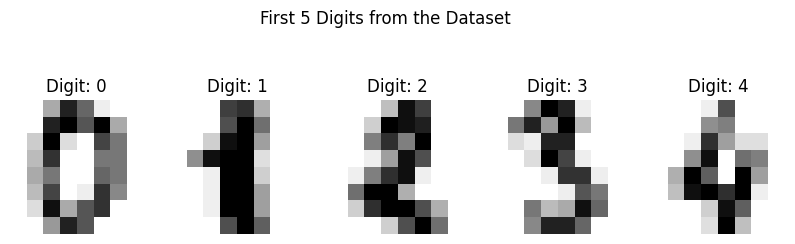

NameError: name 'pd' is not defined

In [ ]:
# 1. Import matplotlib.pyplot as plt.
import matplotlib.pyplot as plt

# 2. Display the first few digit images.
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images[:5], digits.target[:5]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Digit: {label}')
plt.suptitle('First 5 Digits from the Dataset', y=1.02)
plt.show()

# 3. Convert the digits.data array into a pandas DataFrame named X and the digits.target array into a pandas Series named y.
X = pd.DataFrame(digits.data)
y = pd.Series(digits.target, name='digit')

# 4. Print the descriptive statistics of the DataFrame X.
print("\nDescriptive statistics of the features:")
display(X.describe())

# 5. Print the count of each class in the Series y.
print("\nDistribution of classes:")
display(y.value_counts().sort_index())

**Reasoning**:
The previous command failed because the pandas library was not imported. I need to import pandas before using it to create DataFrames and Series.



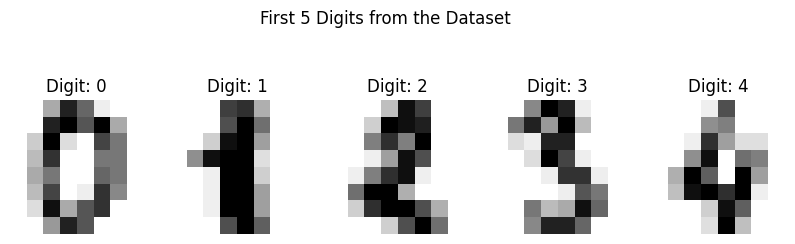


Descriptive statistics of the features:


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000



Distribution of classes:


,count
digit,
0,178
1,182
2,177
3,183
4,181
5,182
6,181
7,179
8,174


In [ ]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt

# Display the first few digit images.
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images[:5], digits.target[:5]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Digit: {label}')
plt.suptitle('First 5 Digits from the Dataset', y=1.02)
plt.show()

# Convert the digits.data array into a pandas DataFrame named X and the digits.target array into a pandas Series named y.
X = pd.DataFrame(digits.data)
y = pd.Series(digits.target, name='digit')

# Print the descriptive statistics of the DataFrame X.
print("\nDescriptive statistics of the features:")
display(X.describe())

# Print the count of each class in the Series y.
print("\nDistribution of classes:")
display(y.value_counts().sort_index())

## División de datos

### Subtask:
Dividir el dataset en conjuntos de entrenamiento y prueba.


**Reasoning**:
The subtask requires splitting the data into training and testing sets using `train_test_split`.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1437, 64)
Shape of X_test: (360, 64)
Shape of y_train: (1437,)
Shape of y_test: (360,)


## Escalado de características

### Subtask:
Escalar las características del dataset para que el modelo funcione mejor.


**Reasoning**:
Import the StandardScaler and scale the training and testing data.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same fitted scaler
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the scaled training and test sets
print("Shape of scaled X_train:", X_train_scaled.shape)
print("Shape of scaled X_test:", X_test_scaled.shape)

Shape of scaled X_train: (1437, 64)
Shape of scaled X_test: (360, 64)


## Entrenamiento del modelo

### Subtask:
Entrenar un modelo de regresión logística con los datos de entrenamiento escalados.


**Reasoning**:
Train a Logistic Regression model using the scaled training data.



In [ ]:
# Create a Logistic Regression model instance
model = LogisticRegression(max_iter=200)

# Train the model using the scaled training data
model.fit(X_train_scaled, y_train)

NameError: name 'LogisticRegression' is not defined

**Reasoning**:
The previous command failed because LogisticRegression was not imported. Import LogisticRegression and train the model again.



In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model instance
model = LogisticRegression(max_iter=200)

# Train the model using the scaled training data
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200)

## Evaluación del modelo

### Subtask:
Predecir en el conjunto de prueba y calcular métricas de clasificación como precisión, recall, F1-score, exactitud y mostrar la matriz de confusión.


**Reasoning**:
Make predictions on the scaled test set and calculate various classification metrics including accuracy, precision, recall, F1-score, and the confusion matrix.



Accuracy: 0.9722
Precision (weighted): 0.9725
Recall (weighted): 0.9722
F1 Score (weighted): 0.9723

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



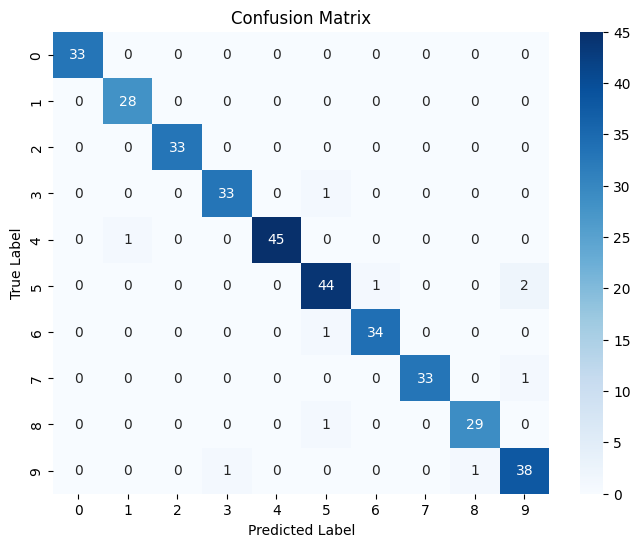

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the scaled test set
y_pred = model.predict(X_test_scaled)

# Calculate and print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate and print Precision, Recall, F1-score (weighted average for multiclass)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")

# Generate and print Classification Report
report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)]) # Assuming digit classes are 0-9
print("\nClassification Report:\n", report)

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

La fórmula del F1 Score es la media armónica de la precisión (Precision) y la exhaustividad (Recall). Se calcula de la siguiente manera:

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Donde:

*   **Precisión** mide la proporción de identificaciones positivas correctas (verdaderos positivos) entre todas las instancias predichas como positivas.
*   **Exhaustividad (Recall)** mide la proporción de identificaciones positivas correctas (verdaderos positivos) entre todas las instancias que son realmente positivas.

El F1 Score es útil cuando se necesita un equilibrio entre Precisión y Exhaustividad, especialmente en problemas con clases desbalanceadas.

In [ ]:
conf_matrix

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]])

## Análisis de errores

### Subtask:
Calcular y visualizar los errores de predicción.


**Reasoning**:
Calculate the error, create a DataFrame for error counts, print the error counts table, and create a histogram of the errors.



Tabla de conteo de errores:


,Error,Conteo
0,0,350
1,-4,2
2,-2,2
3,3,2
4,1,2
5,6,1
6,-1,1


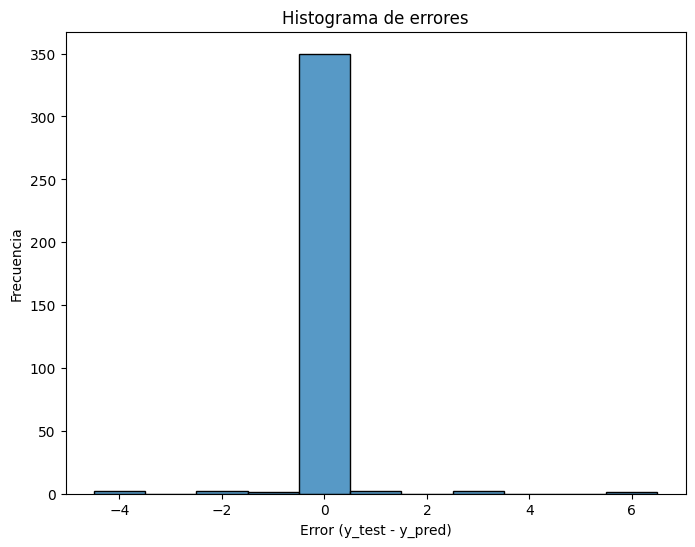

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the error (difference between true and predicted labels)
error = y_test.values - y_pred

# Create a DataFrame for error counts and calculate the count of each unique error value
errors_df = pd.DataFrame({'Error': error})
error_counts = errors_df['Error'].value_counts().reset_index()
error_counts.columns = ['Error', 'Conteo']

# Print the table of error counts
print("Tabla de conteo de errores:")
display(error_counts)

# Create a histogram of errors
plt.figure(figsize=(8, 6))
sns.histplot(error, bins=np.arange(error.min()-0.5, error.max()+1.5, 1), kde=False)
plt.xlabel('Error (y_test - y_pred)')
plt.ylabel('Frecuencia')
plt.title('Histograma de errores')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The digits dataset contains grayscale images of handwritten digits (0-9), each represented by 64 pixel values (8x8 image).
*   The dataset is relatively balanced in terms of class distribution, with a similar number of samples for each digit.
*   After splitting the data into training (80%) and testing (20%) sets and scaling the features, a Logistic Regression model was trained.
*   The trained Logistic Regression model achieved high performance on the test set, with an overall accuracy of 97.22%.
*   The weighted average precision, recall, and F1-score were also high, around 97%.
*   The classification report indicated strong performance for most individual digit classes, with precision, recall, and F1-scores close to 1.0 for digits 0, 1, 2, 4, and 7.
*   Digits 5 and 9 showed slightly lower, but still good, performance, suggesting minimal misclassifications for these classes as visualized in the confusion matrix.
*   An analysis of prediction errors confirmed that the vast majority of predictions (350 out of 360) were correct (error of 0), with only a few instances of misclassification for other error values (-4, -2, -1, 1, 3, 6).

### Insights or Next Steps

*   The Logistic Regression model performs very well on this dataset, suggesting that the features (pixel values) are highly discriminative for digit classification.
*   Further analysis could focus on the specific instances where errors occurred (e.g., errors of -4, -2, 3, 1, 6, -1) to understand common patterns of misclassification and potentially improve the model or data preprocessing.
